In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
bank=pd.read_csv('bank-additional-full.csv',sep=';')

In [40]:
#y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [42]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Bank client data Analysis and Categorical Treatment
Work with the atributes related to bank clients
To make things more clear, i'm going to creat a new datasets that contains just this part of data

In [6]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [7]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [8]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [9]:
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())


Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


#### Age
Trying to find some insights crossing those variables

In [10]:
#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


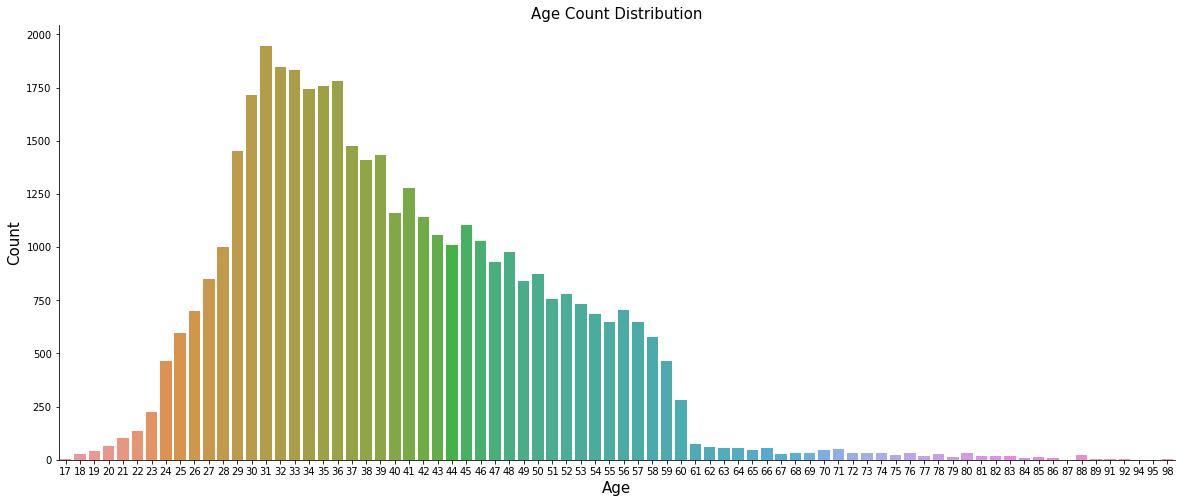

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()


In [43]:
  #y (response)
# convert the response to numeric values and store as a new column
bank['outcome'] = bank.y.map({'no':0, 'yes':1})

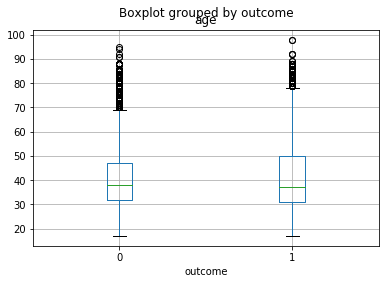

In [44]:
%matplotlib inline
# probably not a great feature since lot of outliers
bank.boxplot(column='age', by='outcome')

In [45]:
## useful features as all values revolve around same space
bank.groupby('job').outcome.mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: outcome, dtype: float64

In [46]:
# create job_dummies (we will add it to the bank DataFrame later)
job_dummies = pd.get_dummies(bank.job, prefix='job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

In [47]:
# looks like a useful feature
bank.groupby('default').outcome.mean()

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: outcome, dtype: float64

In [48]:
# but only one person in the dataset has a status of yes
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [49]:
# so, let's treat this as a 2-class feature rather than a 3-class feature
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})

In [50]:
# convert the feature to numeric values
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})

In [51]:
# looks like a useful feature at first glance
bank.groupby('month').outcome.mean()

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: outcome, dtype: float64

In [52]:
# but, it looks like their success rate is actually just correlated with number of calls
# thus, the month feature is unlikely to generalize
bank.groupby('month').outcome.agg(['count', 'mean']).sort_values('count')

,count,mean
month,,
dec,182,0.489011
mar,546,0.505495
sep,570,0.449123
oct,718,0.438719
apr,2632,0.204787
nov,4101,0.101439
jun,5318,0.105115
aug,6178,0.106021
jul,7174,0.090466


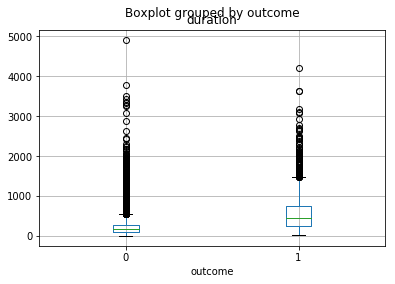

In [53]:
# looks like an excellent feature, but you can't know the duration of a call beforehand, thus it can't be used in your model
bank.boxplot(column='duration', by='outcome')

In [54]:
 #looks like a useful feature
bank.groupby('previous').outcome.mean()

previous
0    0.088322
1    0.212015
2    0.464191
3    0.592593
4    0.542857
5    0.722222
6    0.600000
7    0.000000
Name: outcome, dtype: float64

In [55]:
# looks like a useful feature
bank.groupby('poutcome').outcome.mean()

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: outcome, dtype: float64

In [56]:
# create poutcome_dummies
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)
# concatenate bank DataFrame with job_dummies and poutcome_dummies
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)

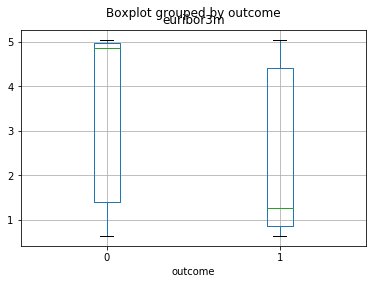

In [57]:
# prepare a boxplot on euribor3m by outcome, and comment on the 'euribor3m' feature
# looks like an excellent feature
bank.boxplot(column='euribor3m', by='outcome')

In [58]:
## create X dataframe having 'default', 'contact', 'previous', 'euribor3m' and including 13 dummy #columns
feature_cols = ['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])
X = bank[feature_cols]
# create y
y = bank.outcome
X.head()

,default,contact,previous,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_nonexistent,poutcome_success
0,0,1,0,4.857,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,0,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,4.857,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0


#### evaluate the model by splitting into train and test sets


In [59]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [60]:
## Import the Classifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

## Instantiate the model with 5 neighbors.
model = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
model.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1401
Accuracy: 0.89


##### The model actually has a 100% accuracy score, since this is a very simplistic data set with distinctly separable classes. But there you have it. That’s how to implement K-Nearest Neighbors with scikit-learn. Load your favorite data set and give it a try!

### How to Decide the Value of N-Neighbours



##### Choosing a large value of K will lead to greater amount of execution time & under fitting. Selecting the #small value of K will lead to over fitting. There is no guaranteed way to find the best value of K.

In [63]:
from sklearn.metrics import accuracy_score
accuracy = []
for K in range(25):
    K_value = K+1
neigh = KNeighborsClassifier(n_neighbors = K_value)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy.append(accuracy_score(y_test,y_pred)*100)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  89.20449947398235 % for K-Value: 25


#### Plots of Accuracy v/s Neighbours

Text(0.5, 1.0, 'Accuracy vs # Neighbors')

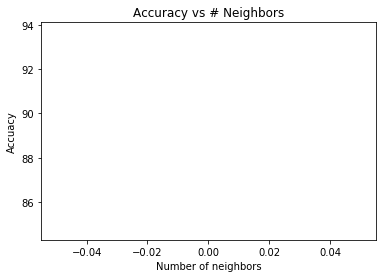

In [65]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.ylabel("Accuacy")
plt.xlabel("Number of neighbors")
plt.title("Accuracy vs # Neighbors")